<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-codes/blob/master/Polynomial_regression_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
df = pd.read_excel("https://github.com/FarshadAmiri/Structural_Engineering/raw/master/D1215/Delta%20state%20considerations/Columns%20D1215%20-%20h%20err%20less%20than%2033prc%20and%20Delta%20ratio%20greater%20than%200.75.xlsx")
df.head()

,sample,Mu33,Mu22,Pu,L,Cb,Delta,Delta ratio,L1tb,h,h_pred,h_err(%),b,tf,tw,section
0,2,30839.745,-136452.345,-2109078.740,5.0,1.519,0.0293,0.879000,1,104.6226,75.782539,28,45.1485,9.9060,5.4991,245
1,9,89128.402,18814.745,-123918.000,4.0,1.894,0.0217,0.813750,1,84.5820,75.782539,10,29.2989,2.4384,1.5367,207
2,19,-278410.033,51803.428,-292414.027,5.0,1.667,0.0296,0.888000,1,101.1936,68.112762,33,40.1955,4.1910,2.3622,261
3,30,-227772.638,26540.576,-262905.445,5.0,1.667,0.0301,0.903000,1,101.0006,68.129471,33,30.2006,4.0000,2.1100,255
4,35,150011.294,74737.041,-261690.433,3.5,1.000,0.0233,0.998571,0,100.8126,75.782539,25,45.2882,4.0005,2.1082,262


Text(0, 0.5, 'h')

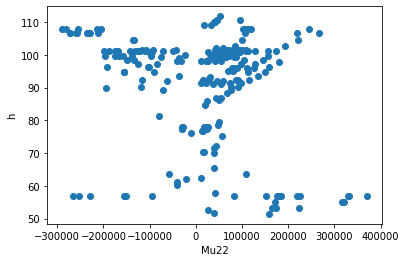

In [ ]:
plt.scatter(df['Mu22'], df['h'])
plt.xlabel('Mu22')
plt.ylabel('h')

Text(0, 0.5, 'h')

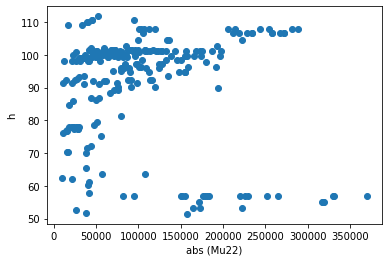

In [ ]:
plt.scatter(abs(df['Mu22']), df['h'])
plt.xlabel('abs (Mu22)')
plt.ylabel('h')

Text(0, 0.5, 'b')

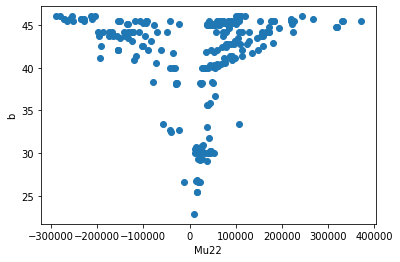

In [ ]:
plt.scatter(df['Mu22'], df['b'])
plt.xlabel('Mu22')
plt.ylabel('b')

Text(0, 0.5, 'b')

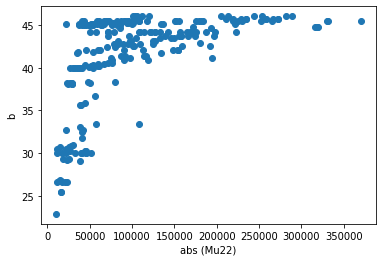

In [ ]:
plt.scatter(abs(df['Mu22']), df['b'])
plt.xlabel('abs (Mu22)')
plt.ylabel('b')

Text(0, 0.5, 'b')

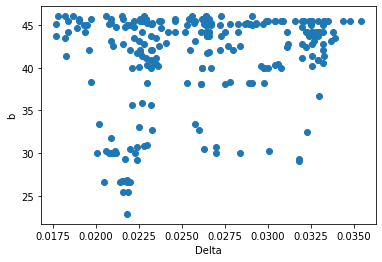

In [ ]:
plt.scatter(df['Delta'], df['b'])
plt.xlabel('Delta')
plt.ylabel('b')

Text(0, 0.5, 'b')

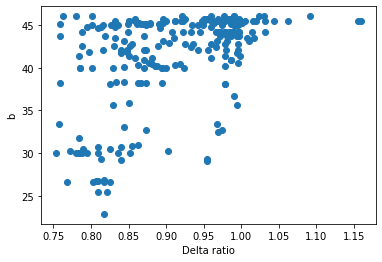

In [ ]:
plt.scatter(df['Delta ratio'], df['b'])
plt.xlabel('Delta ratio')
plt.ylabel('b')

Text(0.5, 0, 'Delta')

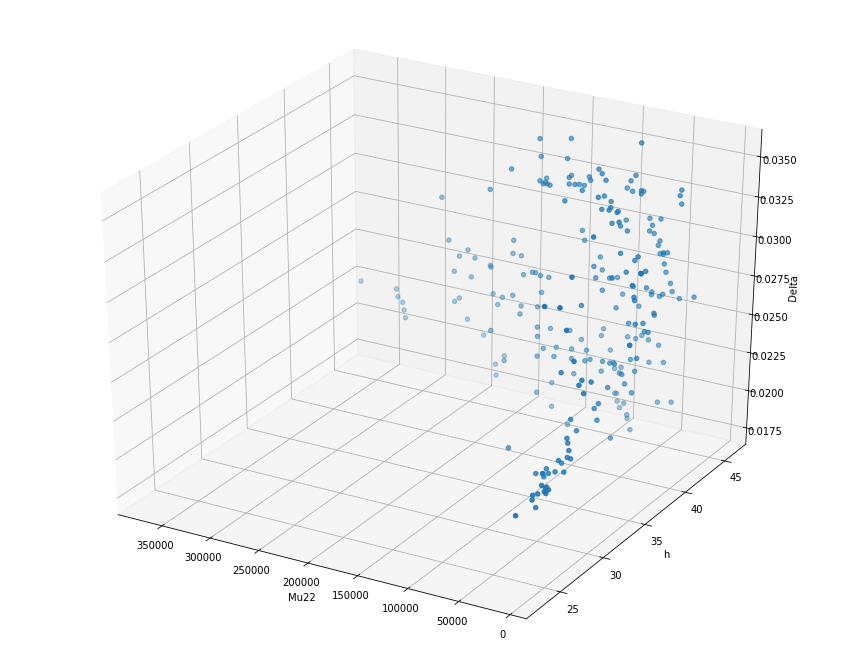

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(abs(df['Mu22']),df['b'],df['Delta'])
ax.invert_xaxis()
ax.set_xlabel('Mu22')
ax.set_ylabel('h')
ax.set_zlabel('Delta')

In [ ]:
selector = np.random.rand(len(df)) < 0.8
train = df[selector]
test = df[~selector]

In [ ]:
train_x = abs(train[['Mu22']])
train_y = train[['b']]

test_x = abs(test[['Mu22']])
test_y = test[['b']]

In [ ]:
# for eg. if degree=3, the regression will be in following format =>
# y = c0 + c1*Mu22**1 + c2*Mu22**2 + c3*Mu22**3

polynomial_degree = 3

poly = PolynomialFeatures(degree = polynomial_degree)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train_x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(20.0, 50.0)

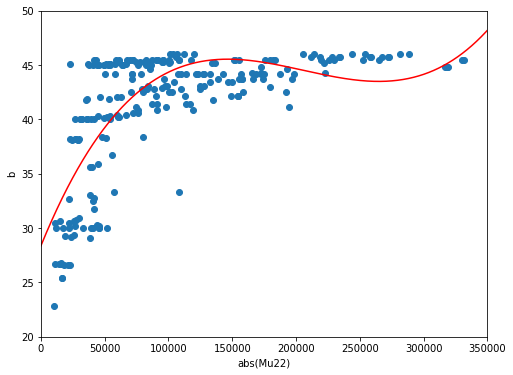

In [ ]:
xx = np.arange(0,350000,50)
poly_reg = reg.intercept_[0]
for i in range(len(reg.coef_[0])-1):
  poly_reg += reg.coef_[0][i+1]*xx**(i+1)
plt.figure(figsize=(8,6))
plt.plot(xx, poly_reg, color = 'red')
plt.xlabel('abs(Mu22)')
plt.ylabel('b')
plt.title('')
plt.scatter(abs(df['Mu22']), df['b'])
plt.xlim (0, 350000)
plt.ylim (20, 50)

In [ ]:
y_pred = reg.predict(test_x_poly)

In [ ]:
print('mae = {0:.1f}'.format(float(np.mean(abs(y_pred - test_y)))))
print('mse = {0:.1f}'.format(float(np.mean((y_pred - test_y)**2))))
print('R-squared = {0:.1f}'.format(float(r2_score(y_pred, test_y))))

mae = 3.5
mse = 18.4
R-squared = 0.0
